In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes

In [ ]:
(x_train,y_train), (x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [ ]:
diabetes=load_diabetes()

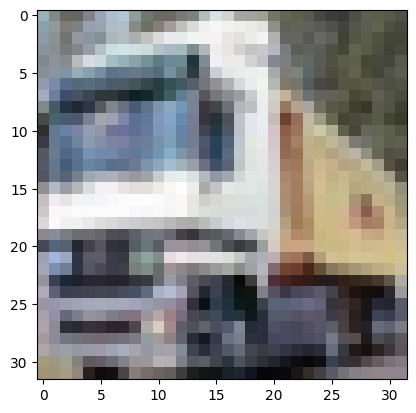

In [ ]:
plt.imshow(x_train[1])

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

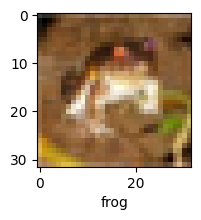

In [ ]:
plot_sample(x_train,y_train,0)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
ann=models.Sequential([
    layers.Conv2D(filters=10,kernel_size=(9,9),activation="relu",input_shape=(336,448,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=10,kernel_size=(6,6),activation="relu"),
    layers.MaxPooling2D((3,3)),
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(2,activation="softmax"),
    layers.Dense(1,activation="relu")

])

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def bottleneck(inputs, num_filters):
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(num_filters, 1, padding="same")(inputs)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x